<a href="https://colab.research.google.com/github/TamizharasanG/Customer-convertion-rate/blob/main/Final_Customer_Convertion_Prediction_with_streamlit_deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Exploration**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from numpy import NaN
import plotly.express as px

In [2]:
data = pd.read_csv("https://github.com/TamizharasanG/Customer-convertion-rate/blob/main/train.csv?raw=true")

In [3]:
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [5]:
data.shape

(45211, 11)

In [6]:
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

Catogerical columns with their Percentage of catogery

In [7]:
data["job"].value_counts()/data.shape[0]*100

blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64

In [8]:
data["marital"].value_counts()/data.shape[0]*100

married     60.193316
single      28.289576
divorced    11.517109
Name: marital, dtype: float64

In [9]:
data["education_qual"].value_counts()/data.shape[0]*100

secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education_qual, dtype: float64

In [10]:
data["call_type"].value_counts()/data.shape[0]*100

cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: call_type, dtype: float64

Since this previous outcome column has more unknown values we should drop this column for the better performence of the model

In [11]:
data["prev_outcome"].value_counts()/data.shape[0]*100

unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: prev_outcome, dtype: float64

In [12]:
data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


**Relationships between Ave vs outcome**

In [13]:
pd.crosstab(data["age"], data["y"])

y,no,yes
age,,
18,5,7
19,24,11
20,35,15
21,57,22
22,89,40
...,...,...
90,0,2
92,0,2
93,0,2


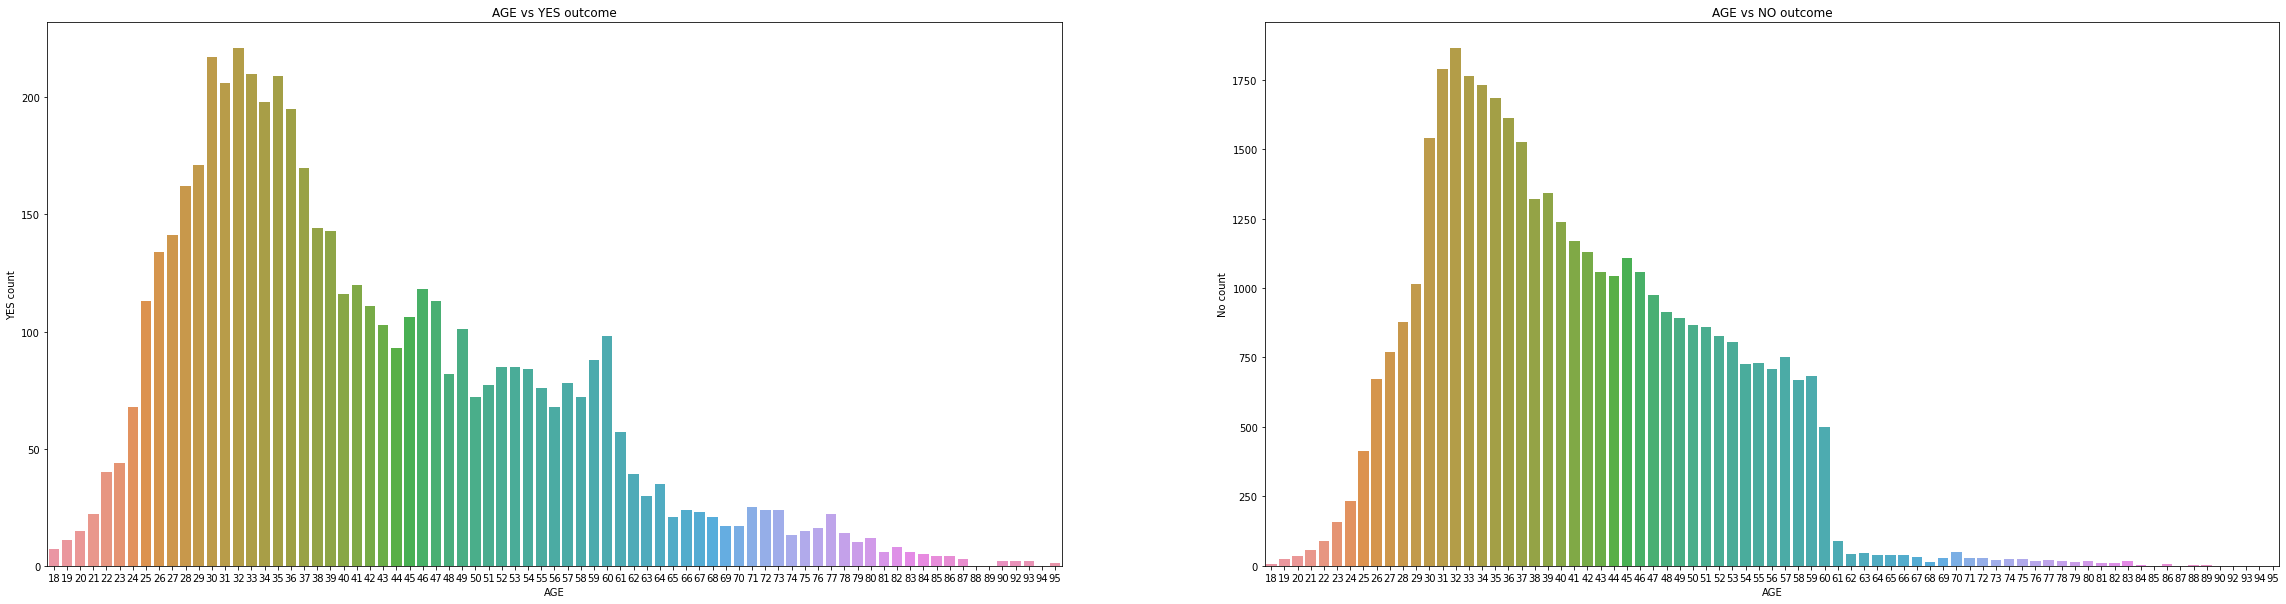

In [14]:
fig = plt.figure(figsize = (40, 10))
plt.subplot(1, 2, 1)
sns.barplot(x = pd.crosstab(data["age"], data["y"]).index , y = "yes", data = pd.crosstab(data["age"], data["y"]))
plt.title("AGE vs YES outcome")
plt.xlabel("AGE")
plt.ylabel("YES count")

plt.subplot(1, 2, 2)
sns.barplot(x = pd.crosstab(data["age"], data["y"]).index , y = "no", data = pd.crosstab(data["age"], data["y"]))
plt.title("AGE vs NO outcome")
plt.xlabel("AGE")
plt.ylabel("No count")
plt.show()


INTUTION BY AGE:
1. The age group of successive convertion is ranges from 24 to 60 and they are more likely to concvert as our customer.
2. The age group of rejection also lies as the same range of 24 to 60. But in this case after 60 years they are more likelt to say yes rather than no.

Conclution  : Customers above the age of 60 have more chance of convertion. But they are less contacted. 

Relationship between Job and outcome

In [15]:
job_vs_outcome = pd.crosstab(data["job"], data["y"])
job_vs_outcome["Convertion Rate in percent"] = round(job_vs_outcome["yes"]/(job_vs_outcome["yes"]+job_vs_outcome["no"])*100, 2)
job_vs_outcome = job_vs_outcome.sort_values("Convertion Rate in percent", ascending = False)
job_vs_outcome

y,no,yes,Convertion Rate in percent
job,,,
student,669,269,28.68
retired,1748,516,22.79
unemployed,1101,202,15.50
management,8157,1301,13.76
admin.,4540,631,12.20
self-employed,1392,187,11.84
unknown,254,34,11.81
technician,6757,840,11.06
services,3785,369,8.88


Intution by Job role : 
1. By analysisng the data the highest convertion rate to customers is Student catogery.
2. The most contacted job role by the company is blue collar and the response from them was least when compared to other roles.
3. Top 3 prefered job role with high convertion rate is Students, Retired, Unemployed

In [16]:
fig_job = px.bar(x = job_vs_outcome.index, y =job_vs_outcome["Convertion Rate in percent"].tolist(), color = job_vs_outcome.index, width=1000, height=400)
fig_job.update_layout(showlegend=False)

Relationship between marital status and outcome

In [17]:
maritual_status_vs_outcome = pd.crosstab(data["marital"], data["y"])
maritual_status_vs_outcome["Convertion Rate in percent"] = round((maritual_status_vs_outcome["yes"]/(maritual_status_vs_outcome["yes"]+maritual_status_vs_outcome["no"]))*100, 2)
maritual_status_vs_outcome = maritual_status_vs_outcome.sort_values("Convertion Rate in percent", ascending = False)
maritual_status_vs_outcome

y,no,yes,Convertion Rate in percent
marital,,,
single,10878,1912,14.95
divorced,4585,622,11.95
married,24459,2755,10.12


Intution by Marital status :
1. Highest convertion rate of the customers with respect to the marital states is Single


In [18]:
fig_marital = px.bar(x = maritual_status_vs_outcome.index, y =maritual_status_vs_outcome["Convertion Rate in percent"].tolist(), color = maritual_status_vs_outcome.index,width=500, height=400)
fig_marital.update_layout(showlegend=False)

Relationship between Educational Qualification and Outcome

In [19]:
education_vs_outcome = pd.crosstab(data["education_qual"], data["y"])
education_vs_outcome["Convertion Rate in percent"] = round(education_vs_outcome["yes"]/(education_vs_outcome["yes"]+education_vs_outcome["no"])*100, 2)
education_vs_outcome = education_vs_outcome.sort_values("Convertion Rate in percent", ascending = False)
education_vs_outcome

y,no,yes,Convertion Rate in percent
education_qual,,,
tertiary,11305,1996,15.01
unknown,1605,252,13.57
secondary,20752,2450,10.56
primary,6260,591,8.63


Intution by Education : 
1. The convertion rate of the customers strongly depends on their educational status.

In [20]:
fig_education = px.bar(x = education_vs_outcome.index, y =education_vs_outcome["Convertion Rate in percent"].tolist(), color = education_vs_outcome.index,width=600, height=400)
fig_education.update_layout(showlegend=False)

Relationship between Call type and outcome

In [21]:
call_type_vs_outcome = pd.crosstab(data["call_type"], data["y"])
call_type_vs_outcome["Convertion Rate in percent"] = round(call_type_vs_outcome["yes"]/(call_type_vs_outcome["yes"]+call_type_vs_outcome["no"])*100, 2)
call_type_vs_outcome = call_type_vs_outcome.sort_values("Convertion Rate in percent", ascending = False)
call_type_vs_outcome

y,no,yes,Convertion Rate in percent
call_type,,,
cellular,24916,4369,14.92
telephone,2516,390,13.42
unknown,12490,530,4.07


In [22]:
fig_call_type = px.bar(x = call_type_vs_outcome.index, y =call_type_vs_outcome["Convertion Rate in percent"].tolist(), color = call_type_vs_outcome.index,width=500, height=400)
fig_call_type.update_layout(showlegend=False)

In [23]:
month_type_vs_outcome = pd.crosstab(data["mon"], data["y"])
month_type_vs_outcome["Convertion Rate in percent"] = round(month_type_vs_outcome["yes"]/(month_type_vs_outcome["yes"]+month_type_vs_outcome["no"])*100, 2)
month_type_vs_outcome = month_type_vs_outcome.sort_values("Convertion Rate in percent", ascending = False)
month_type_vs_outcome

y,no,yes,Convertion Rate in percent
mon,,,
mar,229,248,51.99
dec,114,100,46.73
sep,310,269,46.46
oct,415,323,43.77
apr,2355,577,19.68
feb,2208,441,16.65
aug,5559,688,11.01
jun,4795,546,10.22
nov,3567,403,10.15


Intution by month :
1. This comparison shows the clear relation ship of the convertion rate dependency on the contacted month.
2. March month attacts most of the customers for insurence. And this high convertion rate depends on the end of the financial year.
3. There is also a another evidence that the convertion rate depends on the financial year is that the drastic change in the may month convertion rate

In [24]:
fig_month = px.bar(x = month_type_vs_outcome.index, y =month_type_vs_outcome["Convertion Rate in percent"].tolist(), color = month_type_vs_outcome.index,width=800, height=400)
fig_month.update_layout(showlegend=False)

In [25]:
prev_outcome_type_vs_outcome = pd.crosstab(data["prev_outcome"], data["y"])
prev_outcome_type_vs_outcome["Convertion Rate in percent"] = round(prev_outcome_type_vs_outcome["yes"]/(prev_outcome_type_vs_outcome["yes"]+prev_outcome_type_vs_outcome["no"])*100, 2)
prev_outcome_type_vs_outcome = prev_outcome_type_vs_outcome.sort_values("Convertion Rate in percent", ascending = False)
prev_outcome_type_vs_outcome

y,no,yes,Convertion Rate in percent
prev_outcome,,,
success,533,978,64.73
other,1533,307,16.68
failure,4283,618,12.61
unknown,33573,3386,9.16


Intution by previous outcome : 
1. Success in the previous outcome will have the greater impact on the convertionn rate.

In [26]:
fig_prev_call = px.bar(x = prev_outcome_type_vs_outcome.index, y =prev_outcome_type_vs_outcome["Convertion Rate in percent"].tolist(), color = prev_outcome_type_vs_outcome.index,width=500, height=400)
fig_prev_call.update_layout(showlegend=False)

In [27]:
day_type_vs_outcome = pd.crosstab(data["day"], data["y"])
day_type_vs_outcome["Convertion Rate in percent"] = round(day_type_vs_outcome["yes"]/(day_type_vs_outcome["yes"]+day_type_vs_outcome["no"])*100, 2)
day_type_vs_outcome = day_type_vs_outcome.sort_values("Convertion Rate in percent", ascending = False)
day_type_vs_outcome

y,no,yes,Convertion Rate in percent
day,,,
1,232,90,27.95
10,403,121,23.09
30,1295,271,17.31
22,751,154,17.02
3,901,178,16.50
4,1215,230,15.92
25,707,133,15.83
12,1359,244,15.22
13,1344,241,15.21


In [28]:
fig_day = px.bar(x = day_type_vs_outcome.index, y =day_type_vs_outcome["Convertion Rate in percent"].tolist(), color = day_type_vs_outcome["Convertion Rate in percent"].tolist(),width = 2000,height=600)
fig_day.update_layout(showlegend=False)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [30]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [31]:
num_calls_vs_outcome = pd.crosstab(data["num_calls"], data["y"])
num_calls_vs_outcome["Convertion Rate in percent"] = round(num_calls_vs_outcome["yes"]/(num_calls_vs_outcome["yes"]+num_calls_vs_outcome["no"])*100, 2)
num_calls_vs_outcome = num_calls_vs_outcome.sort_values("Convertion Rate in percent", ascending = False)
num_calls_vs_outcome

y,no,yes,Convertion Rate in percent
num_calls,,,
1,14983,2561,14.60
2,11104,1401,11.20
3,4903,618,11.19
32,8,1,11.11
4,3205,317,9.00
17,63,6,8.70
11,185,16,7.96
5,1625,139,7.88
6,1199,92,7.13


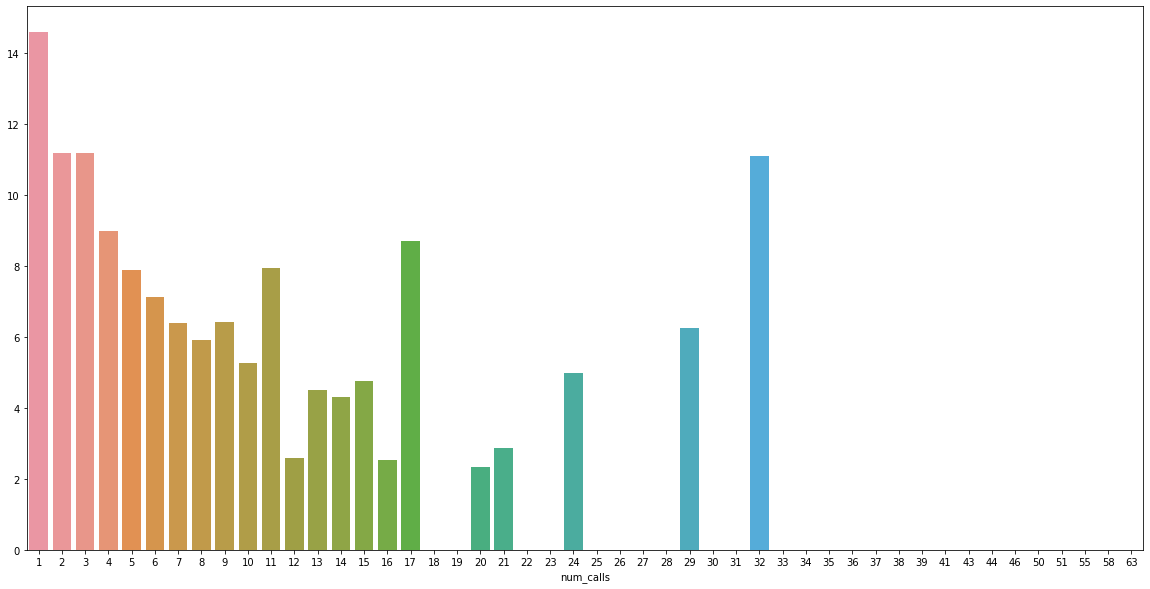

In [32]:
fig_day = plt.figure(figsize = (20, 10))
fig_day = sns.barplot(x = num_calls_vs_outcome.index,y =  num_calls_vs_outcome["Convertion Rate in percent"].tolist(),data= num_calls_vs_outcome)


Intution by Number of calls : 
1. Maximum threshold limit  for number of calls to a single customer is 17
2. After 17 calls if the customer is not responding in positive way means, the customer have very least chance of convertion.

**Removing outlayers in Number of Calls**

In [33]:
num_call_encode1 = {}
for i in data["num_calls"].unique():
  if i > 18:
    num_call_encode1[i] = 18
  elif i <= 18:
    num_call_encode1[i] = i

In [34]:
data_22 = data.copy()
data_22["num_calls"] = data_22["num_calls"].map(num_call_encode1)

In [35]:
num_calls_encoded_vs_outcome = pd.crosstab(data_22["num_calls"], data["y"])
num_calls_encoded_vs_outcome["Convertion Rate in percent"] = round(num_calls_encoded_vs_outcome["yes"]/(num_calls_encoded_vs_outcome["yes"]+num_calls_encoded_vs_outcome["no"])*100, 2)
num_calls_encoded_vs_outcome = num_calls_encoded_vs_outcome.sort_values("Convertion Rate in percent", ascending = False)
num_calls_encoded_vs_outcome

y,no,yes,Convertion Rate in percent
num_calls,,,
1,14983,2561,14.60
2,11104,1401,11.20
3,4903,618,11.19
4,3205,317,9.00
17,63,6,8.70
11,185,16,7.96
5,1625,139,7.88
6,1199,92,7.13
9,306,21,6.42


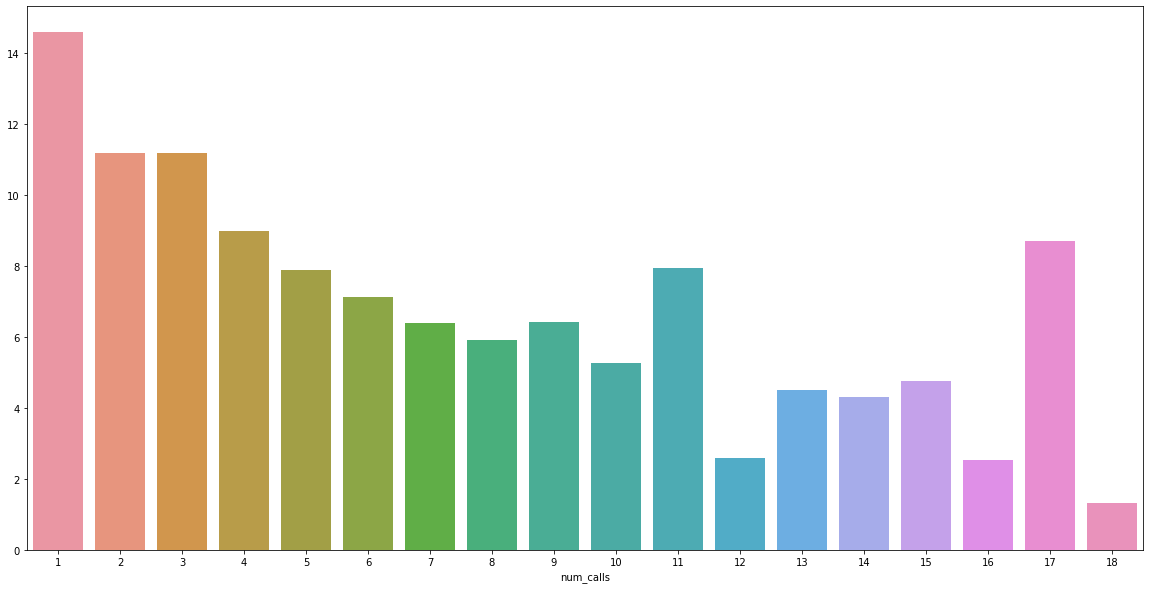

In [36]:
fig_day_encoded = plt.figure(figsize = (20, 10))
fig_day_encoded = sns.barplot(x = num_calls_encoded_vs_outcome.index,y =  num_calls_encoded_vs_outcome["Convertion Rate in percent"].tolist(),data= num_calls_encoded_vs_outcome)


In [37]:
data.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

Text(0.5, 1.0, 'Non Customers')

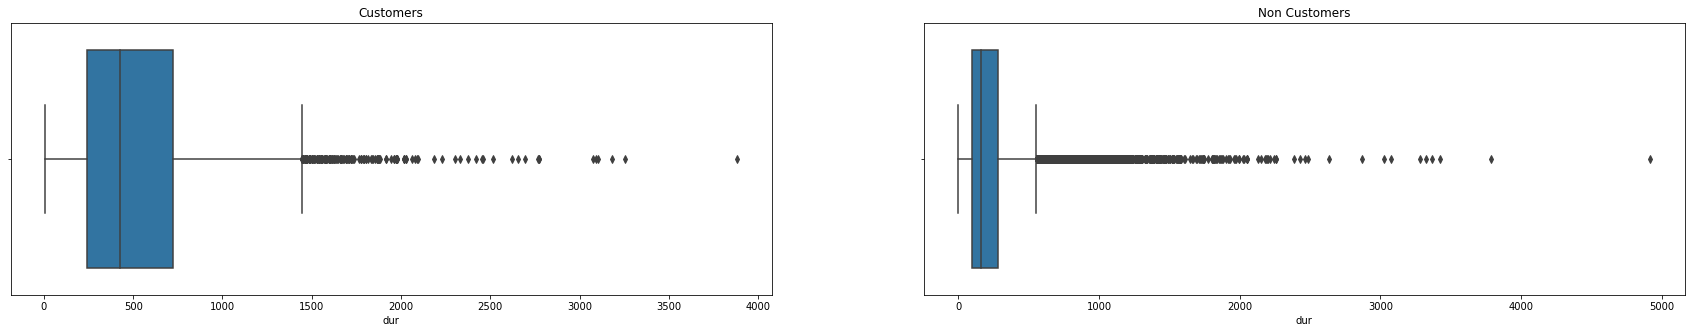

In [38]:
fig_dur = plt.figure(figsize = (30, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x = "dur", data = data[data["y"] == "yes"])
plt.title("Customers")

plt.subplot(1, 2, 2)
sns.boxplot(x = "dur", data = data[data["y"] == "no"])
plt.title("Non Customers")

In [39]:
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [40]:
data.dropna(axis = 0, inplace = True)

# **Model Building**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [42]:
!pip install --upgrade scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 37.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1


In [43]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [44]:
job_encode = {"blue-collar" : 1,
              "entrepreneur" : 2,
              "services" : 3,
              "housemaid" : 4,
              "technician" : 5,
              "self-employed" : 6,
              "admin" : 7,
              "management" : 8,
              "unemployed" : 9,
              "retired" : 10,
              "student" : 11}

marital_encoded = {"married" : 1,
                   "divorced" : 2,
                   "single" : 3}

education_qual_encoded = {"primary" : 1,
                          "secondary" : 2,
                          "tertiary" : 3}

month_encoded = {"may" : 0, "jul" : 1, "jan" : 2, "nov" : 3, "jun" : 4, "aug" : 5, "feb" : 6, "apr" : 7, "oct" : 8, "dec" : 9, "sep" : 10, "mar" : 11}

day_encode = {19 : 1, 20 : 2, 31 : 3, 29 : 4, 28 : 5, 7: 6, 17 : 7, 6:8, 18:9, 21:10, 8:11, 26:12, 5:13, 14:14, 9:15, 11:16, 27:17, 23:18, 16:19, 24:20, 15:21, 2:22, 13:23, 12:24, 25:25, 4:26, 3:27, 22:28, 30:29, 10:30, 1:31}

Y = {"yes" : 1, "no" : 0}

call_type = {"telephone" : 2, "cellular" : 3, "unknown" : 1}

prev_outcome = {"success" : 4, "other" : 3, "failure" : 2, "unknown" : 1}

num_call_encode1 = {}
calls_list = [ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44]
for i in calls_list:
  if i > 18:
    num_call_encode1[i] = 18
  elif i <= 18:
    num_call_encode1[i] = i

num_calls_encode2 = {}
for i, j in zip([18, 16, 12, 14, 13, 15, 10, 8, 7, 9, 6, 5, 11, 17, 4, 3, 2, 1], range(1, 49)):
  num_calls_encode2[i] = j

In [45]:
data_2 = data.copy()
data_2["job"] = data_2["job"].replace("unknown", NaN)
data_2["job"] = data_2["job"].replace("admin.", "admin")
data_2["education_qual"] = data_2["education_qual"].replace("unknown", NaN)
data_2["Job"] = data_2["job"].map(job_encode)
data_2["Education_qual"] = data_2["education_qual"].map(education_qual_encoded)
data_2["Month"] = data_2["mon"].map(month_encoded)
data_2["outcome"] = data_2["y"].map(Y)
data_2["Call_type"] = data_2["call_type"].map(call_type)
data_2["Marital"] = data_2["marital"].map(marital_encoded)
data_2["Prev_outcome"] = data_2["prev_outcome"].map(prev_outcome)
data_2["Day"] = data_2["day"].map(day_encode)
data_2["num_calls"] = data_2["num_calls"].map(num_call_encode1)
data_2["num_calls"] = data_2["num_calls"].map(num_calls_encode2)
data_2.drop(["job", "education_qual", "mon", "y", "call_type","prev_outcome", "marital"],axis = 1, inplace = True)

#Rearranged the columns for our convinence
data_2 = data_2[["age", "Marital","Education_qual","Job","Month","Call_type", "Day","dur", "num_calls", "Prev_outcome","outcome"]]

In [46]:
data_2.isnull().sum()

age                  0
Marital              0
Education_qual    1857
Job                288
Month                0
Call_type            0
Day                  0
dur                  0
num_calls            0
Prev_outcome         0
outcome              0
dtype: int64

In [47]:
imputer = KNNImputer()
data_2 = imputer.fit_transform(data_2)
data_2 = pd.DataFrame(data_2 ,columns = ["age", "Marital","Education_qual","Job","Month","Call_type", "day","dur", "Num_calls", "Prev_outcome","outcome"])
data_2 = data_2[data_2.columns].astype(int)
data_2.isnull().sum()

age               0
Marital           0
Education_qual    0
Job               0
Month             0
Call_type         0
day               0
dur               0
Num_calls         0
Prev_outcome      0
outcome           0
dtype: int64

In [48]:
data_2.head()

,age,Marital,Education_qual,Job,Month,Call_type,day,dur,Num_calls,Prev_outcome,outcome
0,58,1,3,8,0,1,13,261,18,1,0
1,44,3,2,5,0,1,13,151,18,1,0
2,33,1,2,2,0,1,13,76,18,1,0
3,47,1,1,1,0,1,13,92,18,1,0
4,33,3,1,4,0,1,13,198,18,1,0


In [49]:
X = data_2.drop(["outcome"], axis=  1)
y = data_2["outcome"]

X = np.array(X).reshape(data_2.shape[0], -1)
y = np.array(y).reshape(-1, 1).flatten()

#splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)


#Here SMOUT technique is used to handle imbalanced dataset
smote = SMOTE(random_state = 7, sampling_strategy = "all")
s_X_train, s_y_train = smote.fit_resample(X_train, y_train)

***Logistic Regression***

In [50]:
log = LogisticRegression()
log.fit(s_X_train, s_y_train)
y_pred_log = log.predict(X_test)
y_predict_prob_log = log.predict_proba(X_test)
score_log = roc_auc_score(y_test, y_predict_prob_log[:, 1])
acc_log = accuracy_score(y_test, y_pred_log)
print( "ROC score : ",score_log, "Train score : ",log.score(s_X_train, s_y_train), "Test score : ",log.score(X_test, y_test),"Accuracy Score : ",acc_log)

ROC score :  0.8654248403871898 Train score :  0.7902752949588845 Test score :  0.7904747861987614 Accuracy Score :  0.7904747861987614


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [51]:
con_mat_log = pd.DataFrame(confusion_matrix(y_test,y_pred_log),index = ["Act possitive(Non Customer)", "At Negative(Customer)"], columns = ["Pred Possitive(Non Customer)", "Pred Negative(Customer)"])
con_mat_log

,Pred Possitive(Non Customer),Pred Negative(Customer)
Act possitive(Non Customer),9473,2479
At Negative(Customer),363,1249


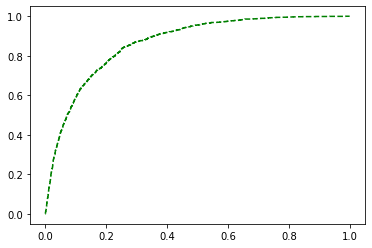

In [52]:
fpr_log, tpr_log, threshold_log = roc_curve(y_test, log.predict_proba(X_test)[:, 1])
plt.plot(fpr_log, tpr_log, "g--")

              precision    recall  f1-score   support

           0       0.96      0.79      0.87     11952
           1       0.34      0.77      0.47      1612

    accuracy                           0.79     13564
   macro avg       0.65      0.78      0.67     13564
weighted avg       0.89      0.79      0.82     13564



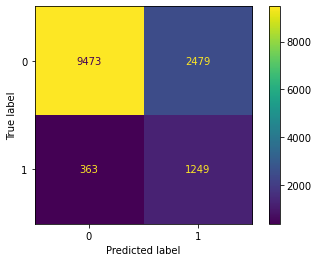

In [53]:
confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_log), display_labels = log.classes_)
print(classification_report(y_test, y_pred_log))
disp_log.plot()

***Random Forest Classifier***

In [54]:
rf = RandomForestClassifier(max_depth = 8, n_jobs = -1)
rf.fit(s_X_train, s_y_train)
y_pred_rf = rf.predict(X_test)
y_predict_prob_rf = rf.predict_proba(X_test)
score_rf = roc_auc_score(y_test, y_predict_prob_rf[:, 1])
acc_rf = accuracy_score(y_test, y_pred_rf)
print("ROC score : ",score_rf, "Train score : ",rf.score(s_X_train, s_y_train), "Test score : ",rf.score(X_test, y_test), "Accuracy Score : ",acc_rf)

ROC score :  0.9034462394657206 Train score :  0.8606185198426886 Test score :  0.8020495429076968 Accuracy Score :  0.8020495429076968


In [55]:
con_mat_rf = pd.DataFrame(confusion_matrix(y_test,y_pred_rf), index = ["Act possitive(Non Customer)", "At Negative(Customer)"], columns = ["Pred Possitive(Non Customer)", "Pred Negative(Customer)"])
con_mat_rf

,Pred Possitive(Non Customer),Pred Negative(Customer)
Act possitive(Non Customer),9472,2480
At Negative(Customer),205,1407


In [56]:
importance_rf = rf.feature_importances_ 
for i in zip(data_2.columns, importance_rf):
  print(i)

('age', 0.02532838831513989)
('Marital', 0.003846103158897047)
('Education_qual', 0.01219743452436885)
('Job', 0.0324490812127935)
('Month', 0.1404535614945499)
('Call_type', 0.09310755484173278)
('day', 0.04346911968393419)
('dur', 0.567863604535073)
('Num_calls', 0.029570769495247735)
('Prev_outcome', 0.05171438273826313)


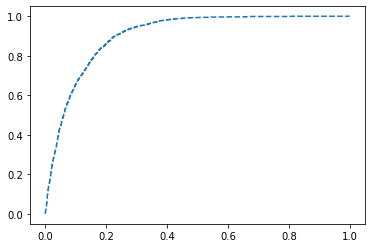

In [57]:
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, "--")

              precision    recall  f1-score   support

           0       0.98      0.79      0.88     11952
           1       0.36      0.87      0.51      1612

    accuracy                           0.80     13564
   macro avg       0.67      0.83      0.69     13564
weighted avg       0.91      0.80      0.83     13564



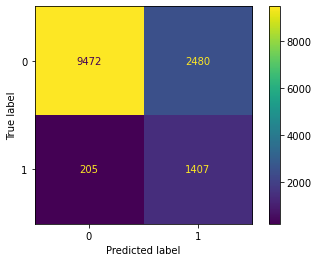

In [58]:
confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf), display_labels = rf.classes_)
print(classification_report(y_test, y_pred_rf))
disp_rf.plot()

**Desition Tree**

In [59]:
dt = DecisionTreeClassifier(max_depth = 8,max_leaf_nodes = 15, random_state = 42)
dt.fit(s_X_train, s_y_train)
y_pred_dt = dt.predict(X_test)
acc_df = accuracy_score(y_test,y_pred_dt)
y_predict_prob_dt = dt.predict_proba(X_test)
score_dt = roc_auc_score(y_test, y_predict_prob_dt[:, 1])
print( "ROC score : ",score_dt, "Train score : ",dt.score(s_X_train, s_y_train), "Test score : ",dt.score(X_test, y_test),"Accuracy Score : ",acc_df)

ROC score :  0.8694601607422245 Train score :  0.8116374687164819 Test score :  0.7549395458566794 Accuracy Score :  0.7549395458566794


In [60]:
con_mat_dt = pd.DataFrame(confusion_matrix(y_test,y_pred_dt), index = ["Act possitive(Non Customer)", "At Negative(Customer)"], columns = ["Pred Possitive(Non Customer)", "Pred Negative(Customer)"])
con_mat_dt

,Pred Possitive(Non Customer),Pred Negative(Customer)
Act possitive(Non Customer),8799,3153
At Negative(Customer),171,1441


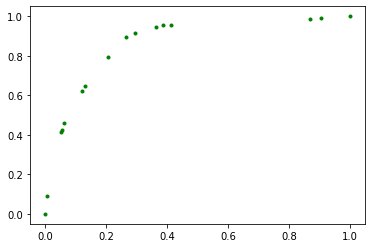

In [61]:
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
plt.plot(fpr_dt, tpr_dt, "g.")

In [62]:
importance_dt = dt.feature_importances_ 
for i in zip(data_2.columns, importance_dt):
  print(i)

('age', 0.0)
('Marital', 0.0)
('Education_qual', 0.0)
('Job', 0.0)
('Month', 0.18529145531716643)
('Call_type', 0.1251966535098208)
('day', 0.03365039642781037)
('dur', 0.6011611900750118)
('Num_calls', 0.0)
('Prev_outcome', 0.05470030467019072)


              precision    recall  f1-score   support

           0       0.98      0.74      0.84     11952
           1       0.31      0.89      0.46      1612

    accuracy                           0.75     13564
   macro avg       0.65      0.82      0.65     13564
weighted avg       0.90      0.75      0.80     13564



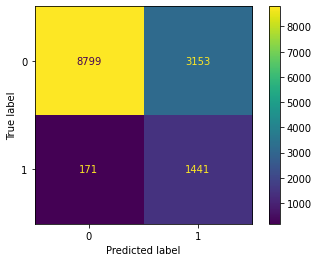

In [63]:
confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dt), display_labels = dt.classes_)
print(classification_report(y_test, y_pred_dt))
disp_dt.plot()

***XGB classifier***

In [64]:
from xgboost import XGBClassifier

smallest_class_count = y_train.sum()
largest_class_count = len(y_train) - smallest_class_count
spw = largest_class_count / smallest_class_count

xgb = XGBClassifier(booster='gbtree', 
			max_depth=20, learning_rate=0.04, 
			n_estimators=100, 
			scale_pos_weight=spw, 
			random_state=42, 
			n_jobs=-1,
      gamma = 47)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_predict_prob_xgb = xgb.predict_proba(X_test)
score_xgb =roc_auc_score(y_test, y_predict_prob_xgb[:, 1])
acc_xgb = accuracy_score(y_test,y_pred_xgb)
print("ROC score : ",score_xgb, "Train Score : ",xgb.score(s_X_train, s_y_train), "Test Score : ", xgb.score(X_test, y_test),  "Accuracy score : ",acc_xgb)

ROC score :  0.9261450267571527 Train Score :  0.8537361458705757 Test Score :  0.8362577410793276 Accuracy score :  0.8362577410793276


In [65]:
con_mat_xgb = pd.DataFrame(confusion_matrix(y_test,y_pred_xgb), index = ["Act possitive(Non Customer)", "At Negative(Customer)"], columns = ["Pred Possitive(Non Customer)", "Pred Negative(Customer)"])
con_mat_xgb

,Pred Possitive(Non Customer),Pred Negative(Customer)
Act possitive(Non Customer),9900,2052
At Negative(Customer),169,1443


In [66]:
X = data_2.drop(["outcome"], axis=  1)
importance_xgb = xgb.feature_importances_
for i in zip(X.columns, importance_xgb):
  print(i)

('age', 0.03920862)
('Marital', 0.039573178)
('Education_qual', 0.03301361)
('Job', 0.05246267)
('Month', 0.09490388)
('Call_type', 0.21670133)
('day', 0.036260646)
('dur', 0.29958072)
('Num_calls', 0.039974194)
('Prev_outcome', 0.1483212)


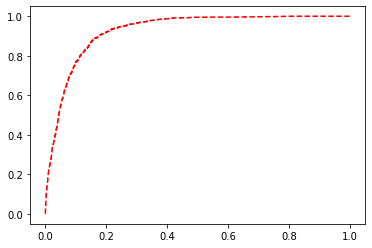

In [67]:
fpr_xgb, tpr_xgb, threshold_xgb = roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])
plt.plot(fpr_xgb, tpr_xgb, "r--")

              precision    recall  f1-score   support

           0       0.98      0.83      0.90     11952
           1       0.41      0.90      0.57      1612

    accuracy                           0.84     13564
   macro avg       0.70      0.86      0.73     13564
weighted avg       0.92      0.84      0.86     13564



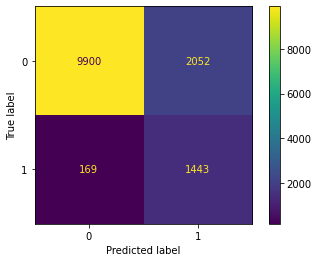

In [68]:
confusion_matrix(y_test, y_pred_xgb)
disp_knn = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb), display_labels = xgb.classes_)
print(classification_report(y_test, y_pred_xgb))
disp_knn.plot()

**KNN**

In [69]:
knn = KNeighborsClassifier(120)
knn.fit(s_X_train, s_y_train)
y_pred_knn = knn.predict(X_test)
y_predict_prob_knn = knn.predict_proba(X_test)
score_knn = roc_auc_score(y_test, y_predict_prob_knn[:, 1])
acc_knn = accuracy_score(y_test,y_pred_knn )
print( "ROC score : ", score_knn, "Train Accuracy : ", knn.score(s_X_train, s_y_train), "Test Accuracy : ",knn.score(X_test, y_test), "Accuracy Score : ",acc_knn)


ROC score :  0.8591429147109529 Train Accuracy :  0.8080085806220951 Test Accuracy :  0.7596579180182836 Accuracy Score :  0.7596579180182836


In [70]:
con_mat_knn = pd.DataFrame(confusion_matrix(y_test,y_pred_knn), index = ["Act possitive(Non Customer)", "At Negative(Customer)"], columns = ["Pred Possitive(Non Customer)", "Pred Negative(Customer)"])
con_mat_knn

,Pred Possitive(Non Customer),Pred Negative(Customer)
Act possitive(Non Customer),8976,2976
At Negative(Customer),284,1328


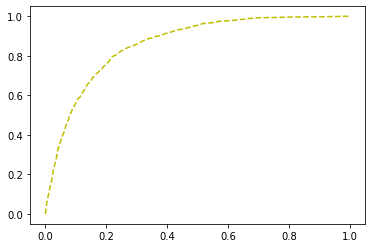

In [71]:
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
plt.plot(fpr_knn, tpr_knn, "y--")


              precision    recall  f1-score   support

           0       0.97      0.75      0.85     11952
           1       0.31      0.82      0.45      1612

    accuracy                           0.76     13564
   macro avg       0.64      0.79      0.65     13564
weighted avg       0.89      0.76      0.80     13564



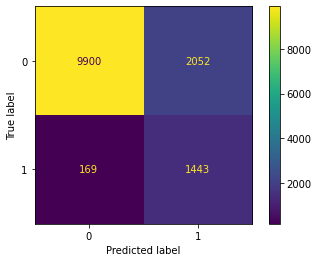

In [72]:
confusion_matrix(y_test, y_pred_knn)
disp_log = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn), display_labels = knn.classes_)
print(classification_report(y_test, y_pred_knn))
disp_knn.plot()

***Voting Classifier***

In [73]:
vc = VotingClassifier(estimators = [('log', log), ('rf', rf), ('dt', dt), ("xgb", xgb), ("knn", knn)],voting='soft')
vc.fit(s_X_train, s_y_train)
y_pred_vc = vc.predict(X_test)
acc_vc = accuracy_score(y_test,y_pred_vc)
y_predict_prob_vc = vc.predict_proba(X_test)
score_vc = roc_auc_score(y_test, y_predict_prob_vc[:, 1])
print("ROC : ", score_vc, "Train Accuracy : ", vc.score(s_X_train, s_y_train), "Test Accuracy : ", vc.score(X_test, y_test), "Accuracy Score :", acc_vc)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:299: UserWarning:

Trying to unpickle estimator DecisionTreeClassifier from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



ROC :  0.9034314470454191 Train Accuracy :  0.8511798355380765 Test Accuracy :  0.7762459451489236 Accuracy Score : 0.7762459451489236


In [74]:
con_mat_vc= pd.DataFrame(confusion_matrix(y_test,y_pred_vc), index = ["Act possitive(Non Customer)", "At Negative(Customer)"], columns = ["Pred Possitive(Non Customer)", "Pred Negative(Customer)"])
con_mat_vc

,Pred Possitive(Non Customer),Pred Negative(Customer)
Act possitive(Non Customer),9055,2897
At Negative(Customer),138,1474


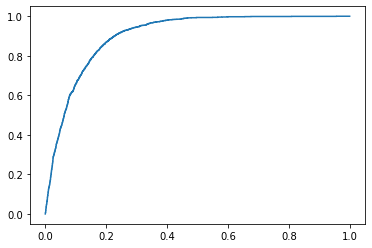

In [75]:
fpr_vc, tpr_vc, threshold_vc = roc_curve(y_test, vc.predict_proba(X_test)[:, 1])
plt.plot(fpr_vc, tpr_vc)

              precision    recall  f1-score   support

           0       0.98      0.76      0.86     11952
           1       0.34      0.91      0.49      1612

    accuracy                           0.78     13564
   macro avg       0.66      0.84      0.67     13564
weighted avg       0.91      0.78      0.81     13564



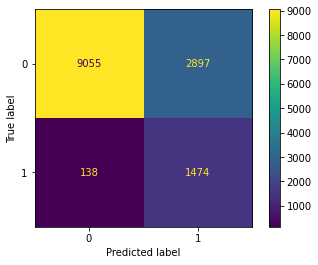

In [76]:
confusion_matrix(y_test, y_pred_vc)
disp_vc = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_vc), display_labels = vc.classes_)
print(classification_report(y_test, y_pred_vc))
disp_vc.plot()

***Consolidating the results of all model to choose the best model***

In [77]:
info = {"Model Name" : ["Logistic Regression", "Random Forest", "Desition Tree", "XGB Classifier", "KNeighboursClassifier", "Voting Classifier"],
        "Test ROC Score" : [score_log, score_rf, score_dt, score_xgb, score_knn, score_vc],
        "False Negatives(Customers Predicted as Non Customers)" : [con_mat_log.iloc[1, 0], con_mat_rf.iloc[1, 0], con_mat_dt.iloc[1, 0], con_mat_xgb.iloc[1, 0], con_mat_knn.iloc[1, 0], con_mat_vc.iloc[1, 0]],
        "True Negatives(Customers Predicted exactly by the model)" : [con_mat_log.iloc[1, 1], con_mat_rf.iloc[1, 1], con_mat_dt.iloc[1, 1], con_mat_xgb.iloc[1, 1], con_mat_knn.iloc[1, 1], con_mat_vc.iloc[1, 1]]}
consolidated_result = pd.DataFrame(info)
consolidated_result.sort_values("False Negatives(Customers Predicted as Non Customers)")

,Model Name,Test ROC Score,False Negatives(Customers Predicted as Non Customers),True Negatives(Customers Predicted exactly by the model)
5,Voting Classifier,0.903431,138,1474
3,XGB Classifier,0.926145,169,1443
2,Desition Tree,0.869460,171,1441
1,Random Forest,0.903446,205,1407
4,KNeighboursClassifier,0.859143,284,1328
0,Logistic Regression,0.865425,363,1249


**Since this is a problem such that the False Negative is more considered . Because if the False Negative rate increases We may lead to loose our Customer and that leads to loss for the company.
So by analysing the various models the model with low False Negative Rate and High ROC Score Voting Classifier and is finalized for the deployment**




***Consolidated Plot of all models***

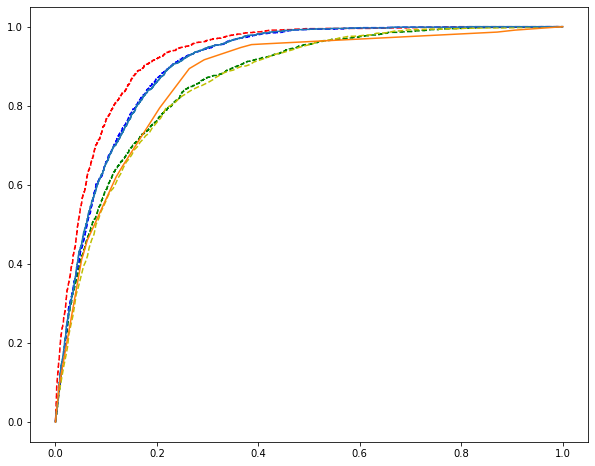

In [78]:
fig = plt.figure(figsize = (10, 8))
fig = plt.plot(fpr_log, tpr_log, "g--")
plt.plot(fpr_xgb, tpr_xgb, "r--")
plt.plot(fpr_vc, tpr_vc, "b--")
plt.plot(fpr_knn, tpr_knn, "y--")
plt.plot(fpr_rf, tpr_rf)
plt.plot(fpr_dt, tpr_dt)

# **Finding the best Threshold value for all models based on the ROC score**




In [79]:
pred=[]
for model in [log,rf,dt,xgb, knn, vc]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9083427901016806


In [80]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
#thresholds
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
print(f"----->>>>  {accuracy_ls.iloc[0, 0]} is the best Threshold value with the highest accuracy of {accuracy_ls.iloc[0, 1]} based on the mean of all models" )
accuracy_ls.head()

----->>>>  0.8407608151821794 is the best Threshold value with the highest accuracy of 0.8941315246240047 based on the mean of all models


,thresholds,accuracy
427,0.840761,0.894132
426,0.840787,0.894132
425,0.841184,0.894058
428,0.840697,0.894058
419,0.843001,0.893984


# **Pickling the model**



1.   As we compared the models. The model with high AUCROC score of 92 and with less False Negative is taken for deployment.
2.   The select model got deployment is XGB classifier
3.   Before deployment the whole data should be trained by the model for the better accuracy of prediction of new data



In [81]:
from sklearn.model_selection import StratifiedKFold

X = data_2.drop(["outcome"], axis=  1)
y = data_2["outcome"]

X_full = np.array(X).reshape(data_2.shape[0], -1)
y_full = np.array(y).reshape(-1, 1).flatten()

xgb.fit(X_full, y_full)
xgb.score(X_full, y_full)

cv = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

print("Train acccuracy of the model with whole data  : ",(cross_val_score(xgb, X, y, cv = cv)))

Train acccuracy of the model with whole data  :  [0.83600575 0.84140677 0.83576642 0.83764654 0.83432869]


In [82]:
import pickle
filename = "XGB_model"
pickle.dump(xgb, open(filename, "wb"))


# ***Model Deployment in Streamlit***

In [83]:
!pip install streamlit -q
!pip install pyngrok
!pip install streamlit-lottie

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
Loo

In [95]:
%%writefile deploy.py
import pickle
import streamlit as st
import pandas as pd
import numpy as np
import requests
import json
from streamlit_lottie import st_lottie
loaded_model = pickle.load(open("XGB_model", "rb"))

job_encode = {"blue-collar" : 1,
              "entrepreneur" : 2,
              "services" : 3,
              "housemaid" : 4,
              "technician" : 5,
              "self-employed" : 6,
              "admin" : 7,
              "management" : 8,
              "unemployed" : 9,
              "retired" : 10,
              "student" : 11}

marital_encoded = {"married" : 1,
                   "divorced" : 2,
                   "single" : 3}

education_qual_encoded = {"primary" : 1,
                          "secondary" : 2,
                          "tertiary" : 3}

month_encoded = {"may" : 0, "jul" : 1, "jan" : 2, "nov" : 3, "jun" : 4, "aug" : 5, "feb" : 6, "apr" : 7, "oct" : 8, "dec" : 9, "sep" : 10, "mar" : 11}

day_encode = {19 : 1, 20 : 2, 31 : 3, 29 : 4, 28 : 5, 7: 6, 17 : 7, 6:8, 18:9, 21:10, 8:11, 26:12, 5:13, 14:14, 9:15, 11:16, 27:17, 23:18, 16:19, 24:20, 15:21, 2:22, 13:23, 12:24, 25:25, 4:26, 3:27, 22:28, 30:29, 10:30, 1:31}

Y = {1 : "our Customer", 0 : "not our customer"}

call_type = {"telephone" : 2, "cellular" : 3, "unknown" : 1}

prev_outcome = {"success" : 4, "other" : 3, "failure" : 2, "unknown" : 1}

num_call_encode1 = {}
calls_list = [ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44]
for i in calls_list:
  if i > 18:
    num_call_encode1[i] = 18
  elif i <= 18:
    num_call_encode1[i] = i

num_calls_encode2 = {}
for i, j in zip([18, 16, 12, 14, 13, 15, 10, 8, 7, 9, 6, 5, 11, 17, 4, 3, 2, 1], range(1, 49)):
  num_calls_encode2[i] = j

def load_lottieurl(url):
  r = requests.get(url)
  if r.status_code != 200:
    return None
  return r.json()



def main():
  st.markdown("<h1 style='text-align: center; color: red;'>XYZ Insurance Company Customer Prediction</h1>", unsafe_allow_html=True)
  Age = st.number_input("Enter Age", 18, 100)
  Marital_status = st.selectbox("Select Marital Status",["Married", "Single", "Divorced"])
  Marital_status = Marital_status.lower()
  Education = st.selectbox("Select Educational Qualification", ["Tertiary", "Secondary", "Primary", "Unknown"])
  Education = Education.lower()
  Job = st.selectbox("Select Job", ["Management", "Technician", "Entrepreneur", "Blue-collar", "Retired", "Admin", "Services", "Self-employed", "Unemployed", "Housemaid", "Student", "Unknown"])
  Job = Job.lower()
  Month = st.selectbox("Last Contacted Month", ["January", "February", "March", "April" , "May", "June", "July", "August" , "September" , "October" , "November", "December"])
  Mon = Month[:3].lower()
  c_type = st.selectbox("Select last call type", ["Cellular", "Telephone"])
  c_type = c_type.lower()
  day = st.number_input("Select last contacted day ",1, 31)
  duration = st.number_input("Enter last call duration in seconds", 0, 6000)
  total_calls = st.number_input("Number of times called before", 1, 100)
  previous_outcome = st.selectbox("Select previous response",['Unknown', 'Failure', 'Other', 'Success'])
  previous_outcome = previous_outcome.lower()
  if st.button("PREDICT"):
    age_1 = Age
    marital_1 = marital_encoded[Marital_status]
    education_1 = education_qual_encoded[Education]
    job_1 = job_encode[Job]
    month_1 = month_encoded[Mon]
    c_type_1 = call_type[c_type]
    day_1 = day_encode[day]
    dur_1 = duration
    total_calls_1 = num_call_encode1[total_calls]
    total_calls_2 = num_calls_encode2[total_calls_1]
    prev_outcome_1 = prev_outcome[previous_outcome]
    input_list = [age_1, marital_1, education_1,job_1,  month_1,c_type_1, day_1 , dur_1, total_calls_2, prev_outcome_1]
    inp_array = np.array([input_list])
    result = loaded_model.predict(inp_array)
    result_1 = Y[int(result[0])]
    st.write("Based on the given inputs above mentioned person is ",result_1)

    if result[0] == 1:
      url = "https://assets6.lottiefiles.com/private_files/lf30_uejkm6yi.json"
    elif result[0] == 0:
      url = "https://assets3.lottiefiles.com/private_files/lf30_yrqbazz5.json"
    lottie_result = load_lottieurl(url)
    st_lottie(
      lottie_result,
      speed = 1,
      reverse = False,
      loop = True,
      quality = "low",
      #renderer = "svg",
      height = 200,
      width = None,
      key = None

    )


  st.write("")
  st.write("")
  st.write("")
  st.write("")

  st.markdown("<h4 style='text-align: center; color: blue;'>Prepared by TAMIZHARASAN GOVINDASAMY</h4>", unsafe_allow_html=True)



if __name__ == "__main__":
  main()

Overwriting deploy.py


In [85]:
!pip install pyngrok==4.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15982 sha256=953fff8e113684893a1d7ab6efe954f912db5396a42bcf34bee96db49ffe6ec5
  Stored in directory: /root/.cache/pip/wheels/89/2d/c2/abe6bcfde6bce368c00ecd73310c11edb672c3eda09a090cfa
Successfully built pyngrok
  Attempting uninstall: pyngrok
    Found existing installation: pyngrok 5.2.1
    Uninstalling pyngrok-5.2.1:
      Successfully uninstalled pyngrok-5.2.1


In [86]:
!ngrok authtoken 2Kjk1sNkgtHmhrvADxwoX7sWOtY_87unGjkb4XkX7h8bLv2fs

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [87]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -qq ngrok-stable-linux-amd64.zip

--2023-03-10 11:44:01--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 18.205.222.128, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  6.02MB/s    in 2.2s    

2023-03-10 11:44:04 (6.02 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]



In [88]:
import json

In [97]:
get_ipython().system_raw('./ngrok http 8501 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://e66b-35-221-218-187.ngrok.io


In [ ]:
!streamlit run /content/deploy.py 